In [1]:
#OpenStack Data is divided in three parts:Normal1,Normal2, Abnormal
#Let's start analyzing the columns and the trends

#3. Abnormal- 10100 rows: columns, IDs and histograms, clusters 
# Columns were merged to form Log desc and Log desc2 --> data cleaning


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data=pd.read_csv('openstack_abnormal_10100.csv')
data.head()

,Log,Date,Time,ID,Type,Source,Column7,Column8,Column9,Column10,...,Log Desc,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Log Desc2
0,nova-api.log.2017-05-14_21:27:04,5/14/2017,7:39:01 PM,25746,INFO,nova.osapi_compute.wsgi.server,[req-5a2050e7-b381-4ae9-92d2-8b08e9f9f4c0,113d3a99c3da401fbd62cc2caa5b96d2,54fadb412c4e40cdbaed9335e4c35a9e,-,...,[req-5a2050e7-b381-4ae9-92d2-8b08e9f9f4c0 113d...,10.11.10.1,GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/serve...,status:,200,len:,1583,time:,0.1919448,10.11.10.1 GET /v2/54fadb412c4e40cdbaed9335e4c...
1,nova-api.log.2017-05-14_21:27:04,5/14/2017,7:39:02 PM,25746,INFO,nova.osapi_compute.wsgi.server,[req-c26a7d54-55ab-412e-947f-421a2cb934fc,113d3a99c3da401fbd62cc2caa5b96d2,54fadb412c4e40cdbaed9335e4c35a9e,-,...,[req-c26a7d54-55ab-412e-947f-421a2cb934fc 113d...,10.11.10.1,GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/serve...,status:,200,len:,1708,time:,0.201158,10.11.10.1 GET /v2/54fadb412c4e40cdbaed9335e4c...
2,nova-compute.log.2017-05-14_21:27:09,5/14/2017,7:39:02 PM,2931,INFO,nova.virt.libvirt.driver,[req-e285b551-587f-4c1d-8eba-dceb2673637f,113d3a99c3da401fbd62cc2caa5b96d2,54fadb412c4e40cdbaed9335e4c35a9e,-,...,[req-e285b551-587f-4c1d-8eba-dceb2673637f 113d...,[instance:,3edec1e4-9678-4a3a-a21b-a145a4ee5e61],Creating,image,NaN,NaN,NaN,NaN,[instance: 3edec1e4-9678-4a3a-a21b-a145a4ee5e6...
3,nova-api.log.2017-05-14_21:27:04,5/14/2017,7:39:03 PM,25746,INFO,nova.osapi_compute.wsgi.server,[req-eb681812-78ae-4a9f-9e2a-96e505285512,113d3a99c3da401fbd62cc2caa5b96d2,54fadb412c4e40cdbaed9335e4c35a9e,-,...,[req-eb681812-78ae-4a9f-9e2a-96e505285512 113d...,10.11.10.1,GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/serve...,status:,200,len:,1759,time:,0.269839,10.11.10.1 GET /v2/54fadb412c4e40cdbaed9335e4c...
4,nova-compute.log.2017-05-14_21:27:09,5/14/2017,7:39:03 PM,2931,INFO,nova.compute.manager,[-],[instance:,2b590f10-49fd-4ec9-ae41-19596c2f4b25],VM,...,[-] [instance: 2b590f10-49fd-4ec9-ae41-19596c2...,Event),NaN,NaN,NaN,NaN,NaN,NaN,NaN,Event)


In [2]:
data.drop(['Column7','Column8','Column9','Column10','Column11','Column12','Column13','Column14','Column15','Column16','Column17','Column18','Column19','Column20'],axis=1, inplace=True)

In [3]:
data.head()

,Log,Date,Time,ID,Type,Source,Log Desc,Log Desc2
0,nova-api.log.2017-05-14_21:27:04,5/14/2017,7:39:01 PM,25746,INFO,nova.osapi_compute.wsgi.server,[req-5a2050e7-b381-4ae9-92d2-8b08e9f9f4c0 113d...,10.11.10.1 GET /v2/54fadb412c4e40cdbaed9335e4c...
1,nova-api.log.2017-05-14_21:27:04,5/14/2017,7:39:02 PM,25746,INFO,nova.osapi_compute.wsgi.server,[req-c26a7d54-55ab-412e-947f-421a2cb934fc 113d...,10.11.10.1 GET /v2/54fadb412c4e40cdbaed9335e4c...
2,nova-compute.log.2017-05-14_21:27:09,5/14/2017,7:39:02 PM,2931,INFO,nova.virt.libvirt.driver,[req-e285b551-587f-4c1d-8eba-dceb2673637f 113d...,[instance: 3edec1e4-9678-4a3a-a21b-a145a4ee5e6...
3,nova-api.log.2017-05-14_21:27:04,5/14/2017,7:39:03 PM,25746,INFO,nova.osapi_compute.wsgi.server,[req-eb681812-78ae-4a9f-9e2a-96e505285512 113d...,10.11.10.1 GET /v2/54fadb412c4e40cdbaed9335e4c...
4,nova-compute.log.2017-05-14_21:27:09,5/14/2017,7:39:03 PM,2931,INFO,nova.compute.manager,[-] [instance: 2b590f10-49fd-4ec9-ae41-19596c2...,Event)


In [4]:
data['Type'].value_counts()

INFO       18159
WARNING      275
Name: Type, dtype: int64

c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


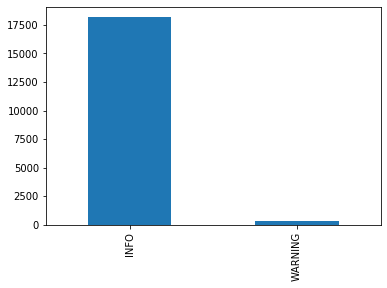

In [5]:
data['Type'].value_counts().plot('bar')

In [6]:
plt.show()

c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


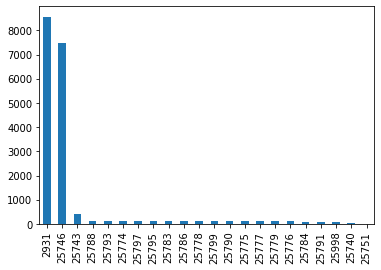

In [7]:
data['ID'].value_counts()
data['ID'].value_counts().plot('bar')
plt.show()

c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


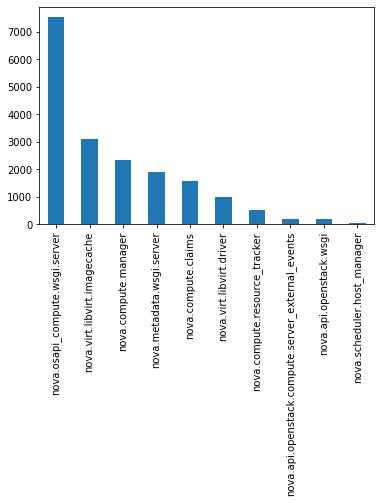

In [8]:
data['Source'].value_counts()
data['Source'].value_counts().plot('bar')
plt.show()

In [9]:
data['Date'].value_counts()

5/14/2017    18434
Name: Date, dtype: int64

In [10]:
#Time series analysis - Type vs day, ID vs day, Source vs day
data['Time'].value_counts()


8:23:47 PM    19
9:23:53 PM    16
8:12:03 PM    16
9:29:25 PM    16
8:01:12 PM    16
              ..
9:20:40 PM     1
7:45:30 PM     1
7:57:48 PM     1
9:30:26 PM     1
9:24:57 PM     1
Name: Time, Length: 5653, dtype: int64

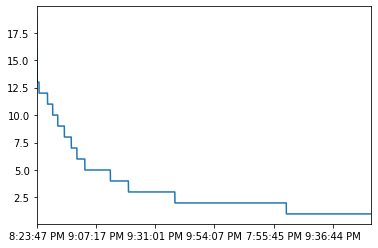

In [11]:
data['Time'].value_counts().plot()
plt.show()

c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


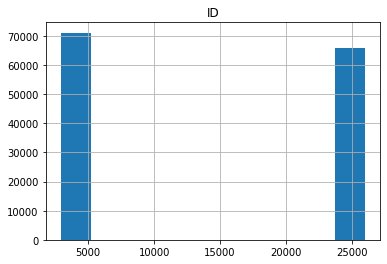

In [12]:
series = pd.read_csv('openstack_normal2_18047.csv', header=0, parse_dates=True, squeeze=True)
series.hist()
plt.show()

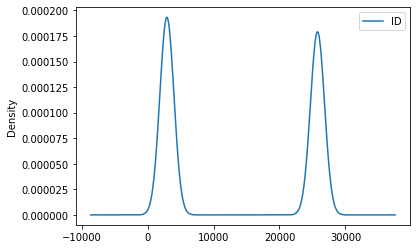

In [13]:
series = pd.read_csv('openstack_normal2_18047.csv', header=0, parse_dates=True, squeeze=True)
series.plot(kind='kde')
plt.show()

c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


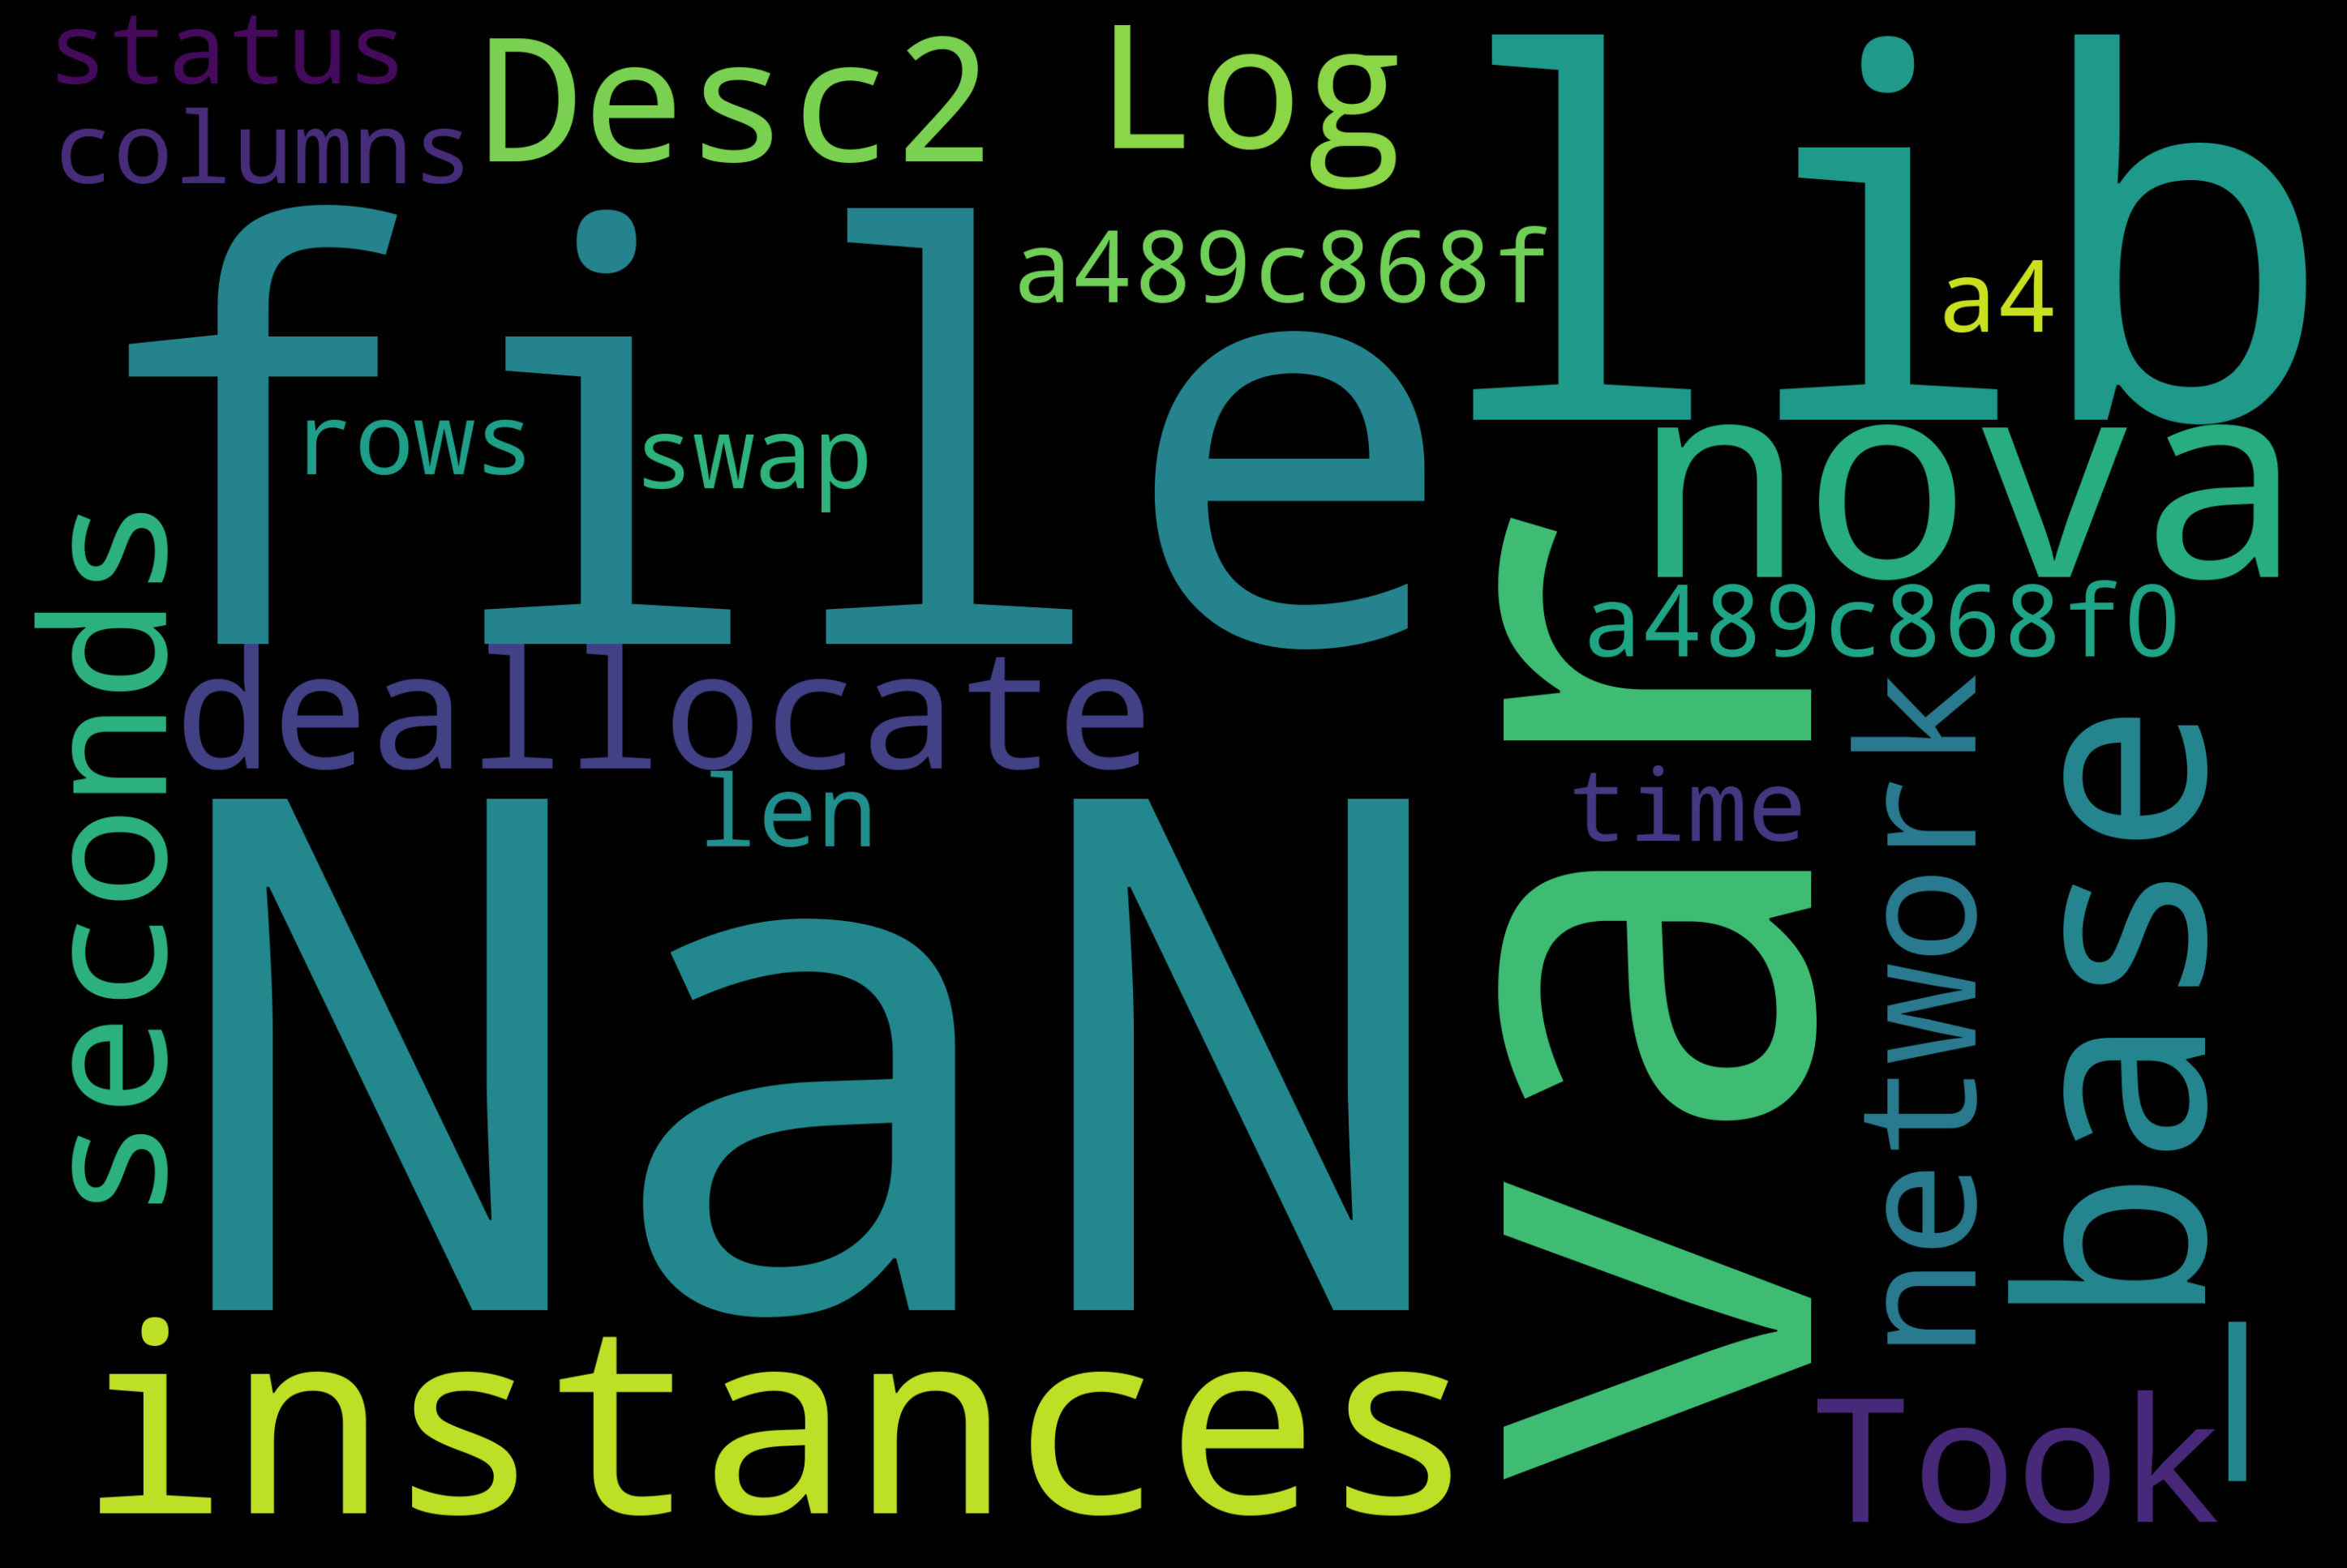

In [14]:
#Word cloud for Log desc2
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

fields=['Log Desc2']
text2 = pd.read_csv('openstack_normal2_18047.csv', usecols=fields)
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text2))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [21]:
#TF IDF for Log desc, Log desc2
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
x = v.fit_transform(data['Log Desc2'].values.astype('U'))

In [22]:
x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
#TF IDF for Log desc, Log desc2
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
y = v.fit_transform(data['Log Desc'].values.astype('U'))

In [18]:
y.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])